In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def RK4(f, x0, t0, tf, dt):
    
    # The arguments passed to the function are:-
    # f = points to the system of ODE's ()
    # x0 is a row vector containing initial values 
    # t0 = initial time; tf = final time
    # dt = step size(sampling time)
    
    
    t = np.arange(t0, tf+dt, dt)  #Creating a time vector starting from 't0' to 'tf' in step size of 'dt'
    
    
    
    nt = t.size   #dims. of col. of soln matrix given by length(size) of the time vector
    nx = x0.size  #dims. of rows of soln matrix given by length(size) of the initial values vector(order of system)
    
    
    x = np.zeros((nx,nt)) #Defining the shape of the solution Matrix; 
                          #the integrated values for the ascending samples are stacked row-wise
    
    
    x[:,0] = x0    #Initialising with the given initial values
    
    
    for k in range(nt-1):
        k1 = dt * f(t[k], x[:,k])
        k2 = dt * f(t[k] + dt/2, x[:,k] + k1/2)
        k3 = dt * f(t[k] + dt/2, x[:,k] + k2/2)
        k4 = dt * f(t[k] + dt, x[:,k] + k3)
        
        dx = (1/6) * ( (k1) + (2 * k2) + (2 * k3) + (k4) )   #incremental change
        x[:,k+1] = x[:,k] + dx   #update for next sample(iteration)
        
    return x,t  #Return the solution matrix and the time vector
    

In [3]:
def quat(x,t):
    w1 = 0.3489*np.sin(0.1*t)
    w2 = 0.3489*0.01;
    w3 = 0.3489*np.cos(0.1*t)
    bo_dot = 0.5*((-x[1]*w1)+(-x[2]*w2)+(-x[3]*w3))
    b1_dot = 0.5*((x[0]*w1)+(-x[3]*w2)+(x[2]*w3))
    b2_dot = 0.5*((x[3]*w1)+(x[0]*w2)+(-x[1]*w3))
    b3_dot = 0.5*((-x[2]*w1)+(x[1]*w2)+(x[0]*w3))
    dxdt = np.array([bo_dot, b1_dot, b2_dot, b3_dot])
    return dxdt

In [4]:
f = lambda t,x : quat(x,t)    #Pointing to the function 'f'

x0 = np.array([0.408248, 0, 0.408248, 0.816497]) #Vector containing initial values
t0 = 0   #Initial Time
tf = 42 #Final Time
dt = 0.01 #Step Size

In [5]:
x,t = RK4(f, x0, t0, tf, dt)

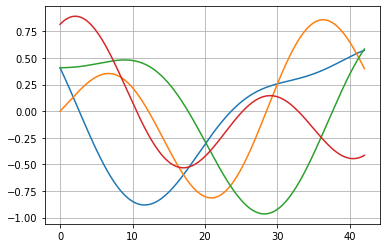

In [6]:
plt.plot(t, x[0,:], t, x[1,:], t, x[2,:], t, x[3,:])
plt.grid(True)
plt.show()